# Implementing XGBoost Regression - HousePrices dataset from Kaggle

#### We will will be importing respective libraries wherever required throughout the notebook. This will make it wasy to understand their significance

In [1]:
#For getting Data and a bit of its calculations.
import numpy as np
import pandas as pd

#For any kind of plot that we want to use to figure out any data aspect for e.g correlation between various feature variables
import matplotlib.pyplot as plt
import seaborn as sns


#This command is to to get all the visualization graphs to work fine in this JupyterNotebook.
#Hence, all plots inline with this notebook.
%matplotlib inline

In [2]:
#Loading out DataSet using Pandas onto Pandas DataFrame
df = pd.read_csv('train.csv', index_col = 'Id')

In [3]:
#Viewing the first five rows of our Data when loaded as it is from the file.
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0    NaN   NaN   

   MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                         
1          NaN       0      2    2008        WD         Normal     208500  
2          NaN       0      5    2007        WD         Normal     181500  
3          NaN       0      9    2008        WD         Normal     223500  
4          NaN       0      2    2006        WD        Abnorml     140000  
5          NaN       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [4]:
#Observing the statistical structure of our data using 'describe' command.
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 37 columns]

In [5]:
#As you can see that only total count and not all the column names were not displayed in above screen.
#Hence using this method to get an idea about the column names in our datarame
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
#Getting the information about the datatypes present in our data columns.
#As we are going to use XGBoost on numerical/integer columns, we will not be dealing with text feature variables.
#Consequently, In this notebook we will not ve using any kind of vectorizer to generate Bag of words 9For text columns).
#We will be dropping those columns from our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

## Some exploratory data analysis and data preparation

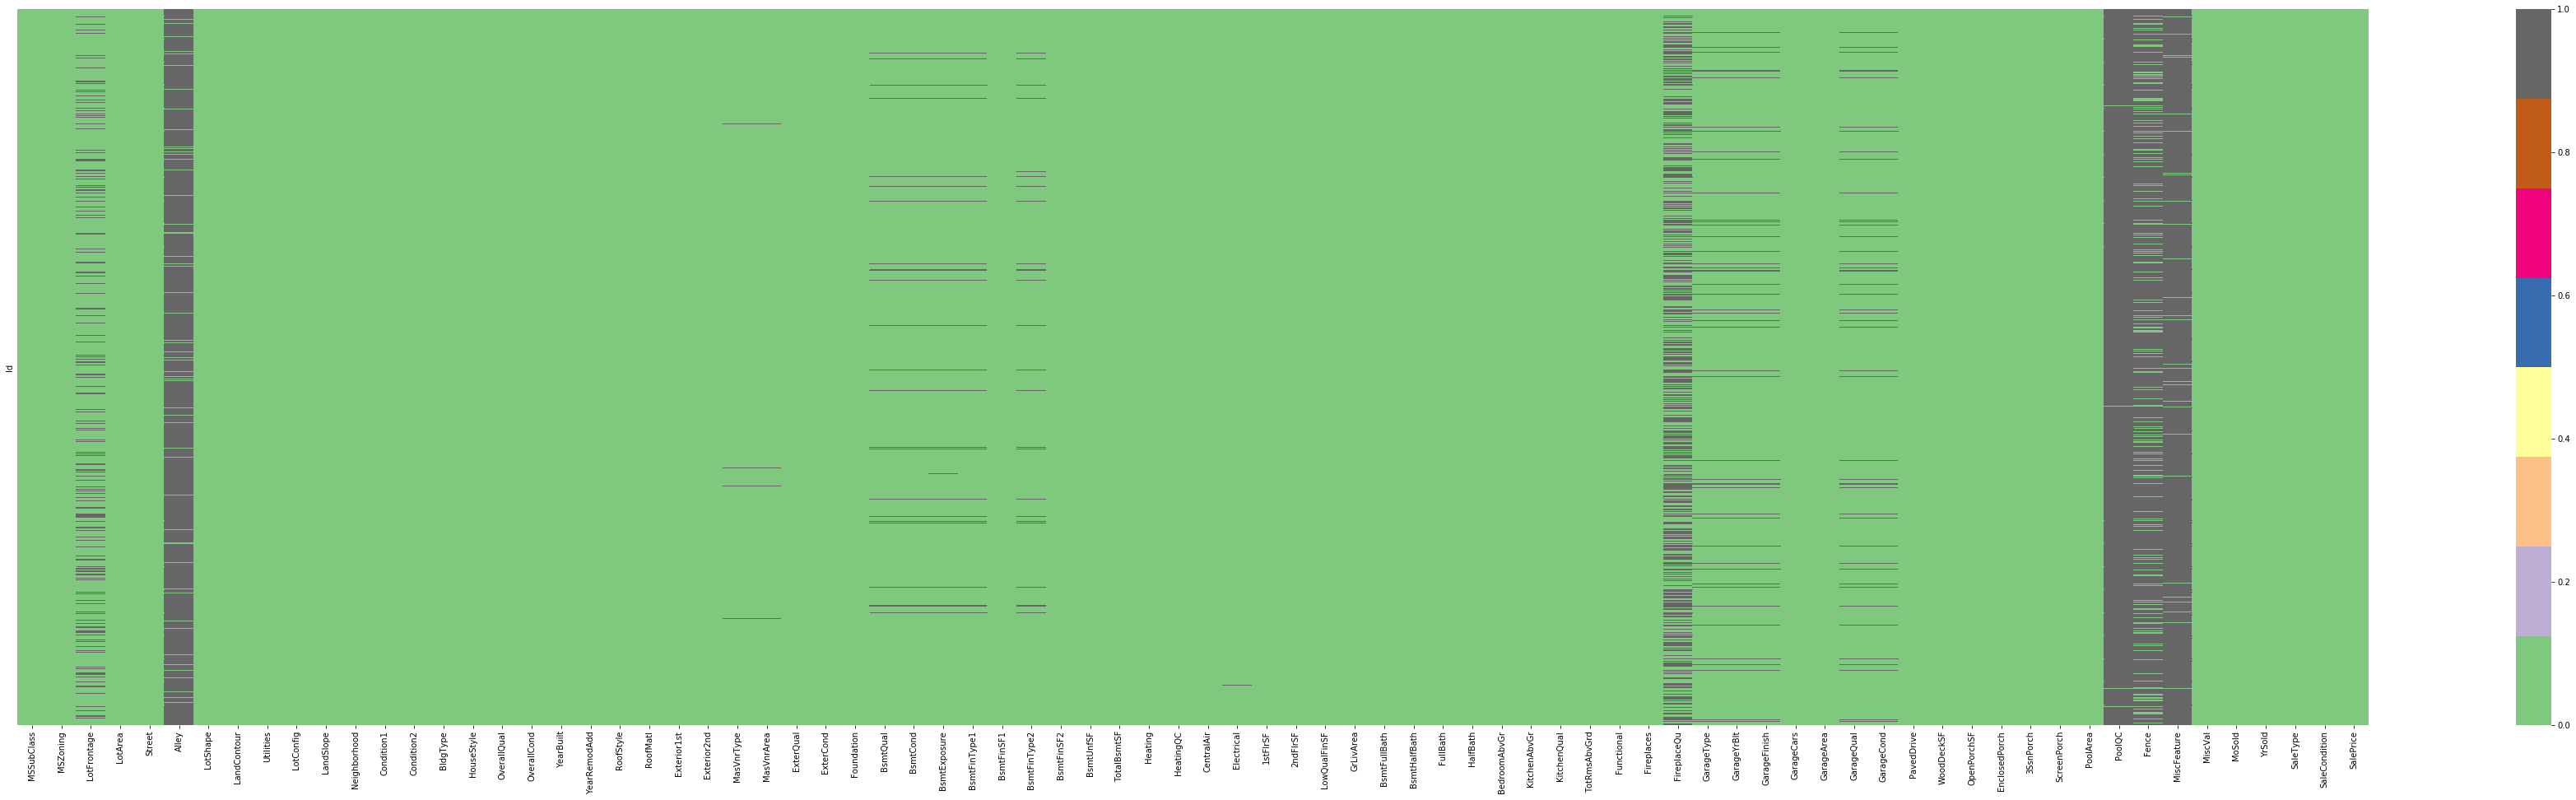

In [7]:
#Figuring out the null values present in our dataset. You can change 'cmap' values below to get the display a bit more sharp.
plt.figure(figsize=(64,16))
sns.heatmap(df.isnull(), yticklabels=False, cmap= 'Accent')
plt.show()

In [8]:
#Use this command if you are going to fill all the missing numerical values in your data with mean in that column.
#Try it out

###df.fillna(value = df.mean(), inplace = True)

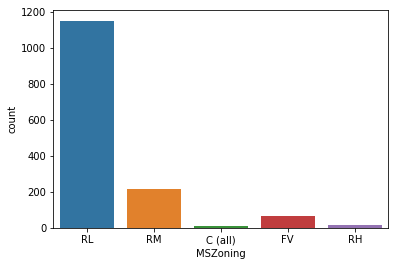

In [9]:
#Observing the total count of each Zoning category in the data. 'RL' is the most recorded Zoning.
sns.countplot(x = 'MSZoning', data = df)

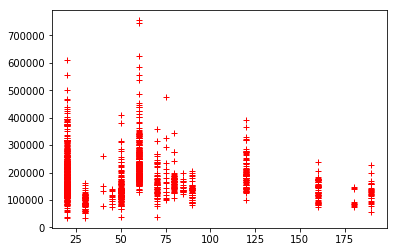

In [13]:
#Comparing SubClass of the houses with their sale price. Here we can see that 50-75 are the costlies subclasses
#This explains us that even the test columns are useful feature variables. 
#We will be using them going further when we will introduce classical NLP techniques.
plt.plot(df['MSSubClass'], df['SalePrice'], 'r+')
plt.show()

In [14]:
#Dropping all the text data which of datatype 'object' in the dataframe.
df = df.select_dtypes(exclude = ['object'])

In [15]:
#Viewing the left out numerical columns from our Dataset
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
#Importing Imputer to replace any Nan values in our data with the mean of the respective column.
#Note that now we only have numerical variables of datatype int64. Hence, filling the blank/NaN with the mean nakes sense.
from sklearn.preprocessing import Imputer
assign = Imputer()
df = assign.fit_transform(df)

In [26]:
#Converting the result of the Imputer (which is always an NumPy array) to Pandas DataFrame.
#We need to copy the column names here. this is where df.columns help us.
df = pd.DataFrame(np.array(df), columns =['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'])

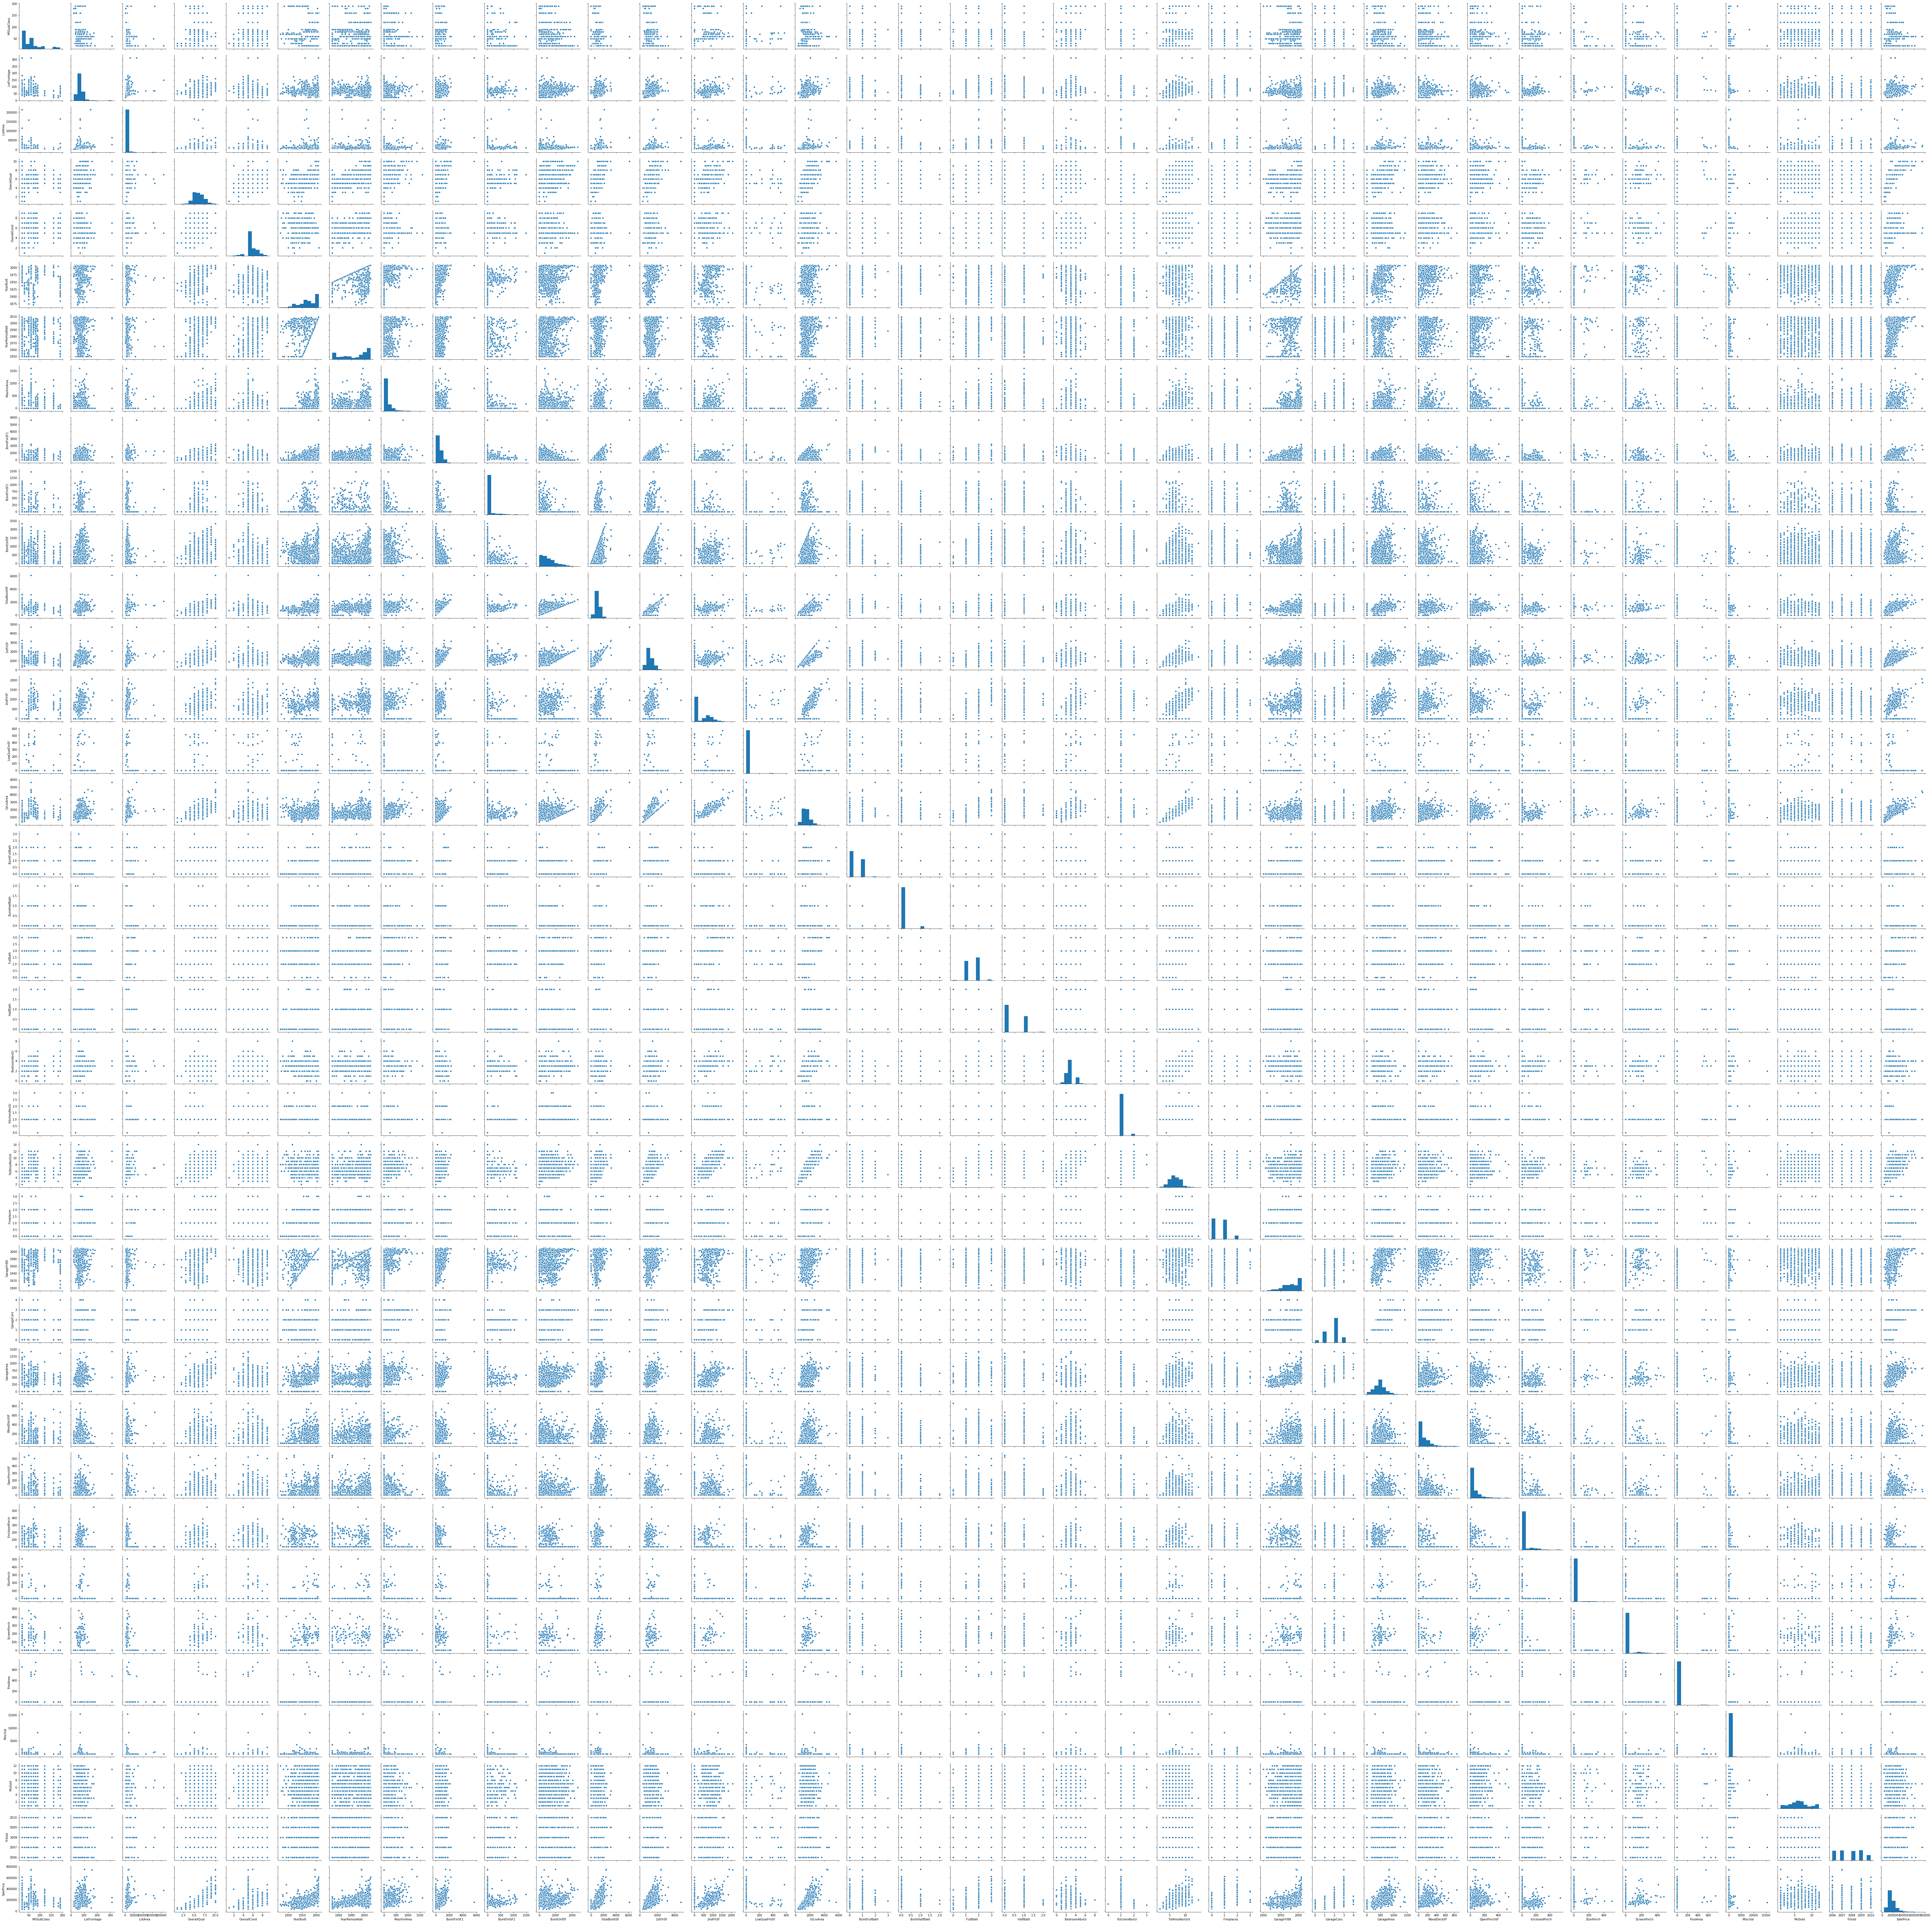

In [27]:
#This is the pair plot which gives us an idea about the correlation of a column with every other column.
#For eg. here, almost all the variables are non-correlated except with themselves.
# This plot gives us a more clear picture when plotted for less number of columns. Try this on your own !

sns.pairplot(df, palette = 'viridis')

In [18]:
#Viewing the head of the data which is ready to be fed into the XGB regression algorithm.
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        60.0         65.0   8450.0          7.0          5.0     2003.0   
1        20.0         80.0   9600.0          6.0          8.0     1976.0   
2        60.0         68.0  11250.0          7.0          5.0     2001.0   
3        70.0         60.0   9550.0          7.0          5.0     1915.0   
4        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2    ...      WoodDeckSF  \
0        2003.0       196.0       706.0         0.0    ...             0.0   
1        1976.0         0.0       978.0         0.0    ...           298.0   
2        2002.0       162.0       486.0         0.0    ...             0.0   
3        1970.0         0.0       216.0         0.0    ...             0.0   
4        2000.0       350.0       655.0         0.0    ...           192.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0            0.0        0.0          0.0       0.0      0.0   
1          0.0            0.0        0.0          0.0       0.0      0.0   
2         42.0            0.0        0.0          0.0       0.0      0.0   
3         35.0          272.0        0.0          0.0       0.0      0.0   
4         84.0            0.0        0.0          0.0       0.0      0.0   

   MoSold  YrSold  SalePrice  
0     2.0  2008.0   208500.0  
1     5.0  2007.0   181500.0  
2     9.0  2008.0   223500.0  
3     2.0  2006.0   140000.0  
4    12.0  2008.0   250000.0  

[5 rows x 37 columns]

## Predicting the SalePrices

In [20]:
#As you have already understood from the ReadMe file that SalePrice is our 'to be predicted' variable.
#Hence, separating prediction and predictor variables
X = df.drop(['SalePrice'], axis =1)
y = df['SalePrice']

In [21]:
#Splitting the data into training set and test set.
#Test set would be used to predict the values which could further be evaluated. Here test set is 30 perc of the whole dataset.
#Random state could be taken as anything as this is just the way our dataset is shuffled before splitting it up.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [22]:
#Training the XGBoost model using the training dataset.
#Here we are using Learning rate as 0.05 and no of estimators = 1000.
#Time to train is directly proportional to estimators and inversly proportional to learning rate.

from xgboost import XGBRegressor
xgbmodel = XGBRegressor(learning_rate = 0.05, n_estimators = 1000 )
xgbmodel.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [24]:
#Predicting the values using trained XGBoost model for the test dataset.
#All the predicted values would be saved in this predictions variable

predictions = xgbmodel.predict(X_test)

## Evaluating the Model

In [25]:
#As we have the actual values even for the test set.
#We will compare those values with the predicted ones to measure the accuracy.
#Here we will be calculating mean absolute error. You can also go for Mean squared error or root mean squared error.

from sklearn.metrics import mean_absolute_error
print("Mean absolute error :", mean_absolute_error(predictions,y_test))

Mean absolute error : 15919.580550799086
